## 1. 데이터 불러오기

In [1]:
import pandas as pd

# 상대경로로 불러오기
train_file_path = 'Test.csv'
test_file_path = 'Train.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [2]:
display(train_df)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


## 2. 전처리
- 결측치는 중앙값으로 대체
- 이상치는 냅뒀음

In [3]:
# 필요한 컬럼 외 제거
train_df = train_df.drop(columns=['ID', 'Gender', 'Work_Experience', 'Var_1'])
test_df = test_df.drop(columns=['ID', 'Gender', 'Work_Experience', 'Var_1'])

In [4]:
tr_df = train_df.copy()
te_df = test_df.copy()

re_marry_cols = {'No':1, 'Yes':2}
tr_df['Ever_Married'] = tr_df['Ever_Married'].map(re_marry_cols)
te_df['Ever_Married'] = te_df['Ever_Married'].map(re_marry_cols)

re_graduated_cols = {'No':1, 'Yes':2}
tr_df['Graduated'] = tr_df['Graduated'].map(re_graduated_cols)
te_df['Graduated'] = te_df['Graduated'].map(re_graduated_cols)

re_proffesion_cols = {'Artist':1, 'Healthcare':2, 'Entertainment':3,
                      'Doctor':4, 'Engineer':5, 'Executive':6, 'Lawyer':7, 'Marketing':8, 'Homemaker':9}
tr_df['Profession'] = tr_df['Profession'].map(re_proffesion_cols)
te_df['Profession'] = te_df['Profession'].map(re_proffesion_cols)

re_ss_cols = {'Low':1, 'Average':2, 'High':3}
tr_df['Spending_Score'] = tr_df['Spending_Score'].map(re_ss_cols).astype(int)
te_df['Spending_Score'] = te_df['Spending_Score'].map(re_ss_cols).astype(int)

re_seg_cols = {'A':1, 'B':2, 'C':3, 'D':4}
tr_df['Segmentation'] = tr_df['Segmentation'].map(re_seg_cols).astype(int)
te_df['Segmentation'] = te_df['Segmentation'].map(re_seg_cols).astype(int)

In [5]:
from sklearn.impute import SimpleImputer

constant_imputer = SimpleImputer(strategy='median')
#re_seg_cols = {1:'A', 2:'B', 3:'C', 4:'D'}

median_train_df = constant_imputer.fit_transform(tr_df)
median_train_df = pd.DataFrame(median_train_df)
median_train_df.columns = tr_df.columns
#median_train_df['Segmentation'] = median_train_df['Segmentation'].map(re_seg_cols)

median_test_df = constant_imputer.fit_transform(te_df)
median_test_df = pd.DataFrame(median_test_df)
median_test_df.columns = te_df.columns
#median_test_df['Segmentation'] = median_test_df['Segmentation'].map(re_seg_cols)

median_train_df

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,2.0,36.0,2.0,5.0,1.0,1.0,2.0
1,2.0,37.0,2.0,2.0,2.0,4.0,1.0
2,2.0,69.0,1.0,3.0,1.0,1.0,1.0
3,2.0,59.0,1.0,6.0,3.0,2.0,2.0
4,1.0,19.0,1.0,8.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...
2622,1.0,29.0,1.0,2.0,1.0,4.0,2.0
2623,1.0,35.0,2.0,4.0,1.0,1.0,1.0
2624,1.0,53.0,2.0,3.0,1.0,2.0,3.0
2625,2.0,47.0,2.0,6.0,3.0,5.0,3.0


In [6]:
median_test_df

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,1.0,22.0,1.0,2.0,1.0,4.0,4.0
1,2.0,38.0,2.0,5.0,2.0,3.0,1.0
2,2.0,67.0,2.0,5.0,1.0,1.0,2.0
3,2.0,67.0,2.0,7.0,3.0,2.0,2.0
4,2.0,40.0,2.0,3.0,3.0,6.0,1.0
...,...,...,...,...,...,...,...
8063,1.0,22.0,1.0,3.0,1.0,7.0,4.0
8064,1.0,35.0,1.0,6.0,1.0,4.0,4.0
8065,1.0,33.0,2.0,2.0,1.0,1.0,4.0
8066,1.0,27.0,2.0,2.0,1.0,4.0,2.0


In [7]:
print(median_train_df.isnull().sum())
print()
print(median_test_df.isnull().sum())

Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Segmentation      0
dtype: int64

Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Segmentation      0
dtype: int64


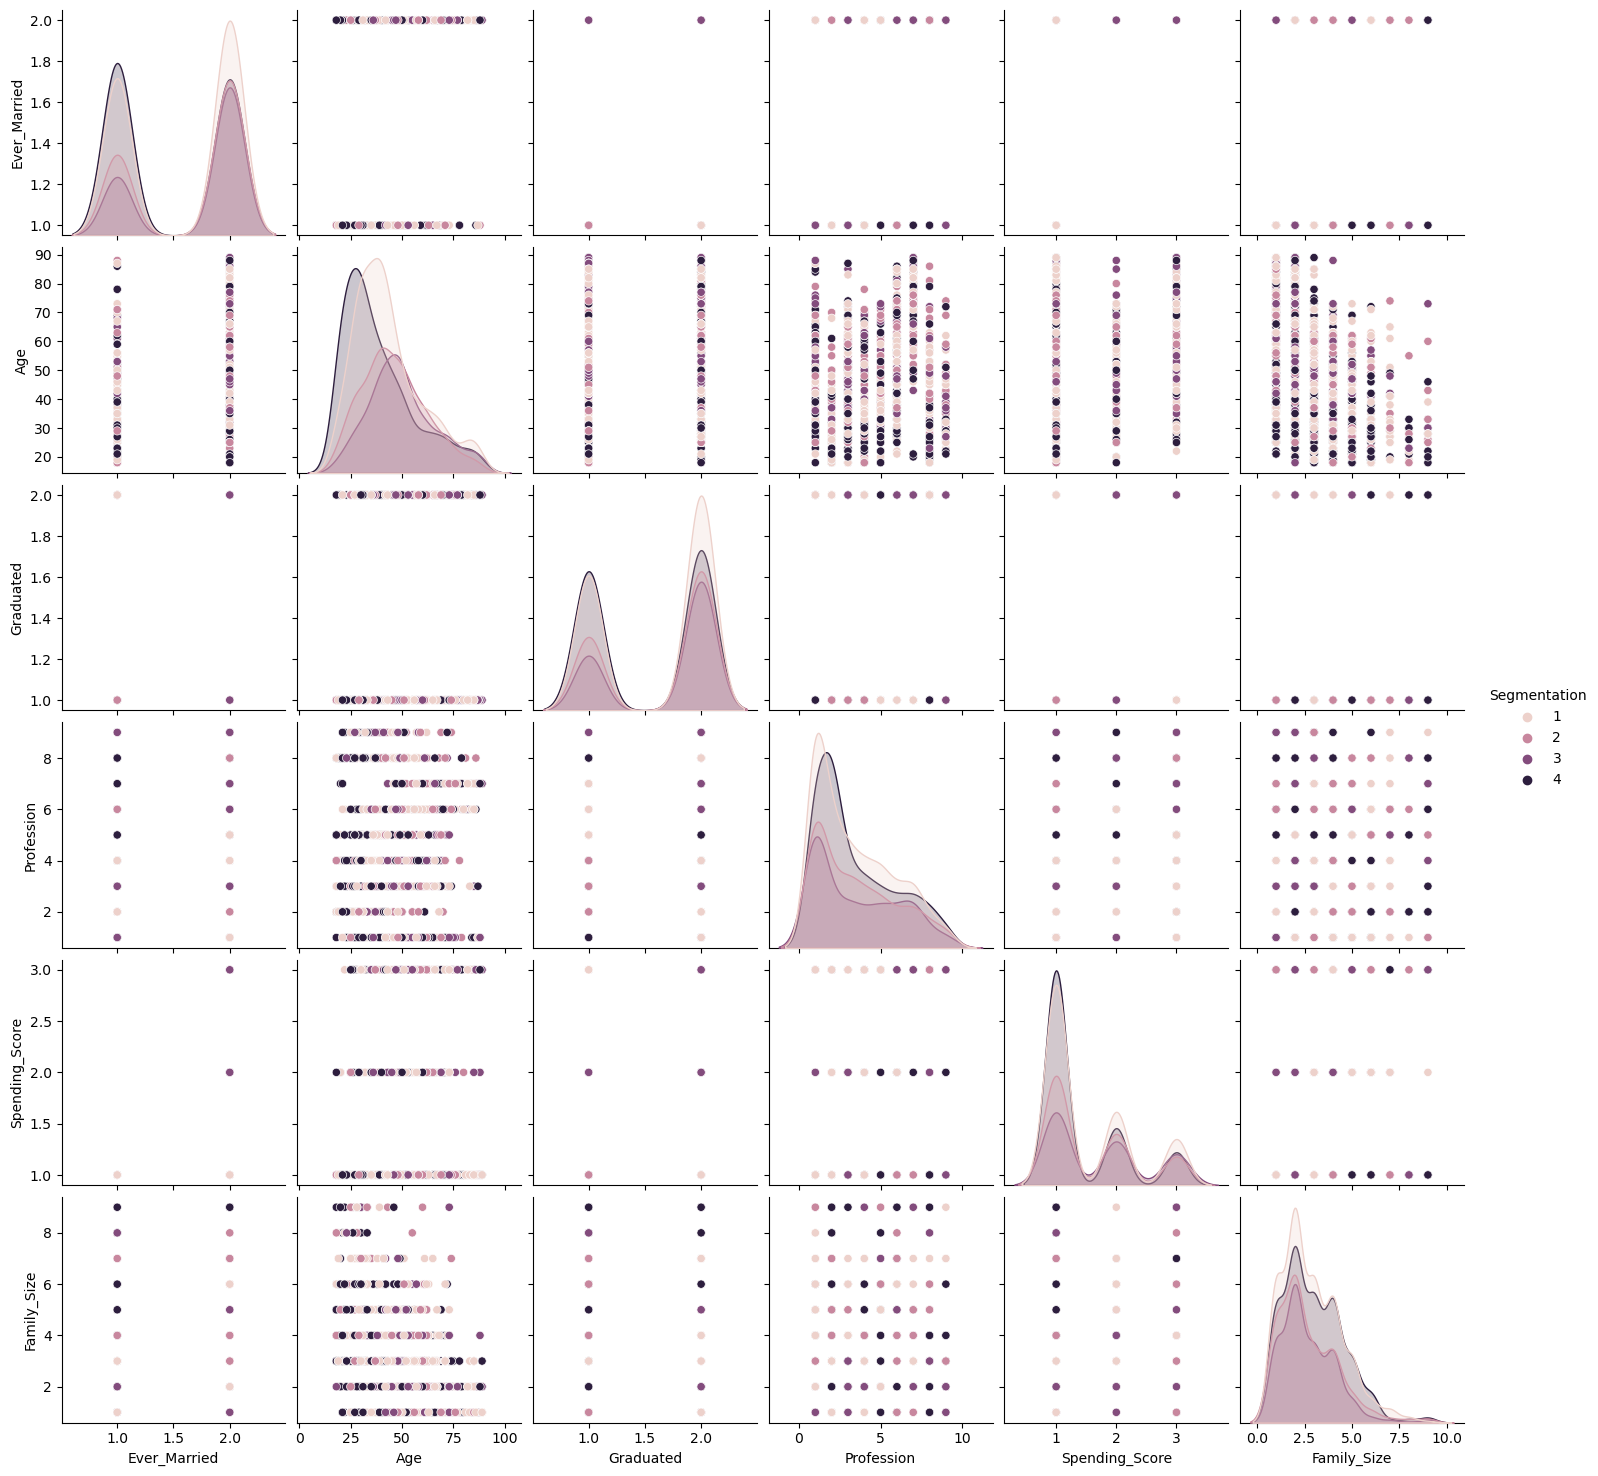

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(tr_df, hue='Segmentation')
plt.show()

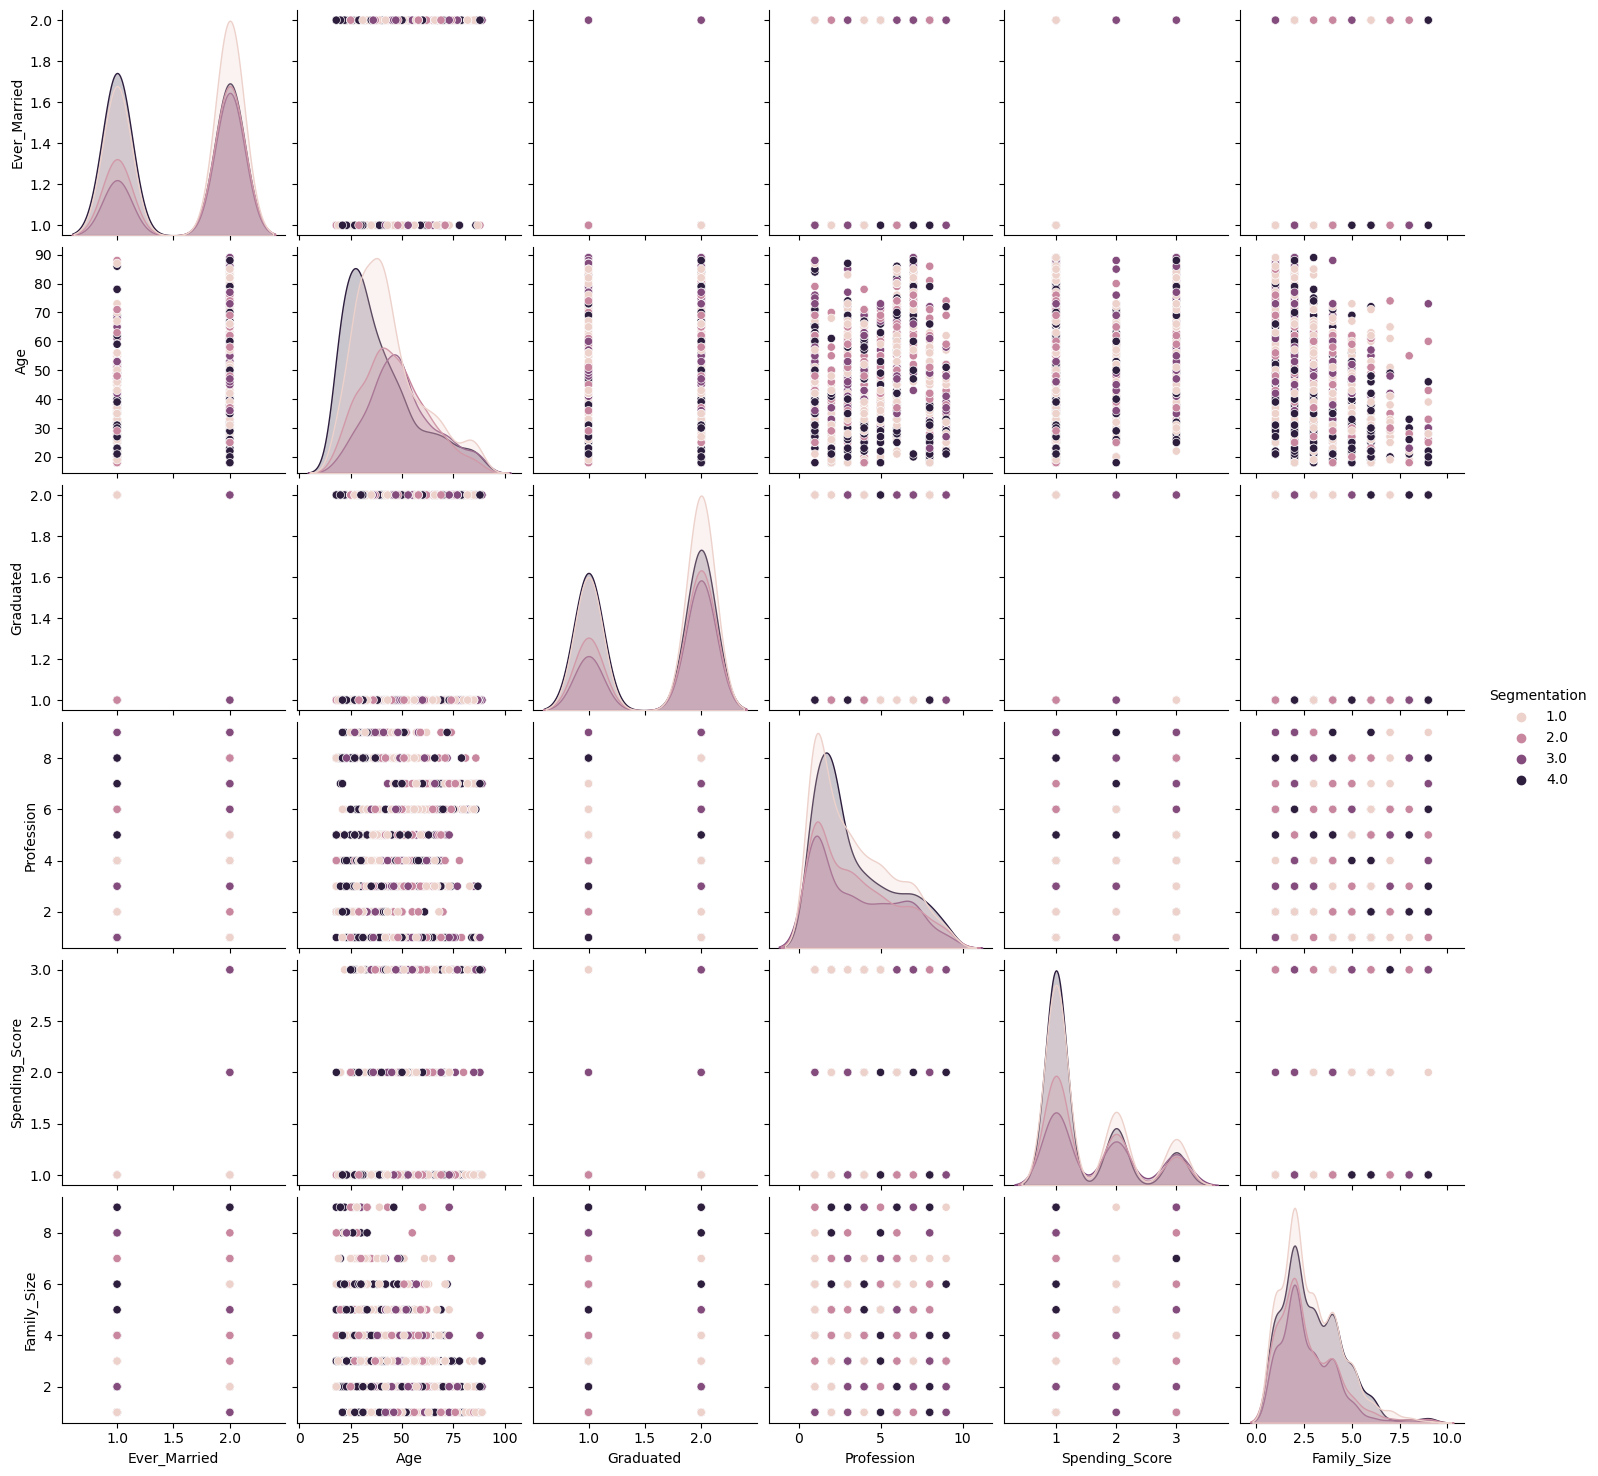

In [9]:
sns.pairplot(median_train_df, hue='Segmentation')
plt.show()

## 3. 다중 로지스틱 회귀 모델로 분류하기

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def rogistic_regression(x_train, x_test, y_train, y_test):
    # 분류(clf; classification) 모델 생성: 다중 분류 로지스틱 회귀 분석 이용
    # 이진 분류(로지스틱 회귀)와 다른 점은 확률로 변환시켜주는 함수를 시그모이드 함수가 아니라 소프트맥스 함수를 사용
    clf = LogisticRegression()
    clf = clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    
    re_seg_cols = {1:'A', 2:'B', 3:'C', 4:'D'}
    y_pred_str = np.vectorize(re_seg_cols.get)(y_pred)
    y_test_str = np.vectorize(re_seg_cols.get)(y_test)

    # 정확도 및 보고서
    accuracy = accuracy_score(y_test_str, y_pred_str)
    report = classification_report(y_test_str, y_pred_str)

    print('Accuracy: ', accuracy)
    print('Classification Report:')
    print(report)
    
    return y_pred

### 1) features group: Ever_Married, Age, Graduated, Spending_Score

In [23]:
cols = median_train_df.columns[[0, 1, 2, 4]]
cols

Index(['Ever_Married', 'Age', 'Graduated', 'Spending_Score'], dtype='object')

In [24]:
train_df[cols]

,Ever_Married,Age,Graduated,Spending_Score
0,Yes,36,Yes,Low
1,Yes,37,Yes,Average
2,Yes,69,No,Low
3,Yes,59,No,High
4,No,19,No,Low
...,...,...,...,...
2622,No,29,No,Low
2623,No,35,Yes,Low
2624,No,53,Yes,Low
2625,Yes,47,Yes,High


In [25]:
x_train = median_train_df[cols]
x_test  = median_test_df[cols]
x_train

,Ever_Married,Age,Graduated,Spending_Score
0,2.0,36.0,2.0,1.0
1,2.0,37.0,2.0,2.0
2,2.0,69.0,1.0,1.0
3,2.0,59.0,1.0,3.0
4,1.0,19.0,1.0,1.0
...,...,...,...,...
2622,1.0,29.0,1.0,1.0
2623,1.0,35.0,2.0,1.0
2624,1.0,53.0,2.0,1.0
2625,2.0,47.0,2.0,3.0


In [26]:
y_train = median_train_df['Segmentation']
y_test  = median_test_df['Segmentation']
y_train

0       2.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
2622    2.0
2623    1.0
2624    3.0
2625    3.0
2626    1.0
Name: Segmentation, Length: 2627, dtype: float64

In [27]:
y_pred = rogistic_regression(x_train, x_test, y_train, y_test)

Accuracy:  0.3771690629647992
Classification Report:
              precision    recall  f1-score   support

           A       0.26      0.66      0.38      1972
           B       0.00      0.00      0.00      1858
           C       0.34      0.08      0.14      1970
           D       0.59      0.69      0.64      2268

    accuracy                           0.38      8068
   macro avg       0.30      0.36      0.29      8068
weighted avg       0.32      0.38      0.31      8068



C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

### 2) features group: Ever_Married, Age, Graduated, Family_Size

In [28]:
cols = median_train_df.columns[[0, 1, 2, 5]]
cols

Index(['Ever_Married', 'Age', 'Graduated', 'Family_Size'], dtype='object')

In [30]:
x_train = median_train_df[cols]
x_test = median_test_df[cols]

y_train = median_train_df['Segmentation']
y_test  = median_test_df['Segmentation']

y_pred = rogistic_regression(x_train, x_test, y_train, y_test)

Accuracy:  0.3580813088745662
Classification Report:
              precision    recall  f1-score   support

           A       0.25      0.63      0.36      1972
           B       0.00      0.00      0.00      1858
           C       0.23      0.05      0.09      1970
           D       0.57      0.68      0.62      2268

    accuracy                           0.36      8068
   macro avg       0.26      0.34      0.27      8068
weighted avg       0.28      0.36      0.28      8068



C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CaptainPark\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bei